In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns=["ID","Gender","Age","Income","Score"]
df.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

ID        0
Gender    0
Age       0
Income    0
Score     0
dtype: int64

There are no missing values

Let's do some visualization

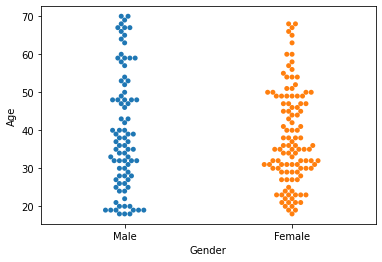

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.swarmplot(x="Gender",y="Age",data=df)
plt.show()

From the above graph, we can see that females shop more than males. For females, 20-30 age group happens to shop the most

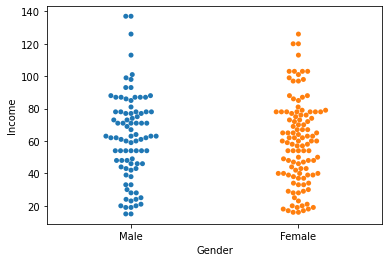

In [6]:
sns.swarmplot(x="Gender",y="Income",data=df)
plt.show()

Nothing much to infer from the above graph

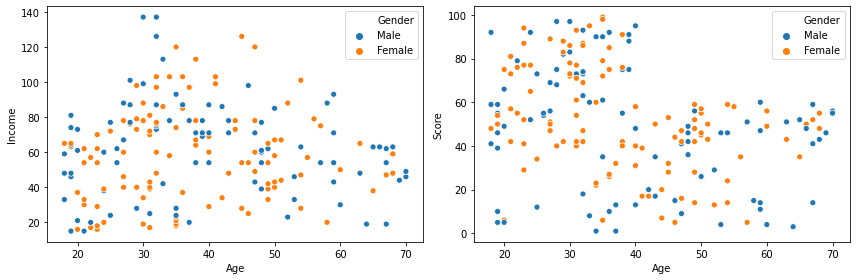

In [7]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
sns.scatterplot(x="Age",y="Income",data=df,hue="Gender",ax=axs[0])
sns.scatterplot(x="Age",y="Score",data=df,hue="Gender",ax=axs[1])
plt.tight_layout()
plt.show()

There is no proper relation between Income, Score and age from above scatter plots

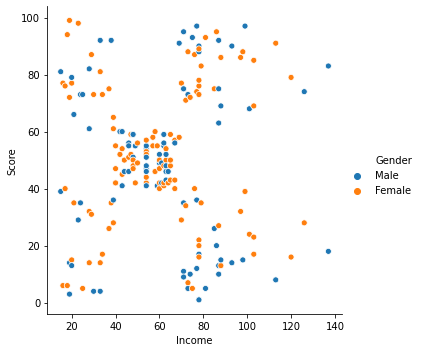

In [8]:
sns.relplot("Income","Score",data=df,hue="Gender")

There is no segregation in terms of gender. But the score and income have a good relation. The data also can be segregated into 5 clusters.

Let's make a K-Means cluster with just Income and spending score variables

In [9]:
#Dividing into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=1234)
df_train = df_train.drop(["ID"],axis=1)
df_test = df_test.drop(["ID"],axis=1)
df_train.shape

(150, 4)

In [10]:
df_train_2col = df_train[["Income","Score"]]
df_test_2col = df_test[["Income","Score"]]
tmp_train = df_train_2col.copy()

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df_train_2col)
df_train_2col["labels"] = model.predict(df_train_2col).copy()
df_test_2col["labels"] = model.predict(df_test_2col).copy()
df_train_2col.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Income,Score,labels
17,21,66,0
11,19,99,0
191,103,69,2
132,72,34,1
95,60,52,0


Now we have clusters for both train and test data. Let's visualize these clusters

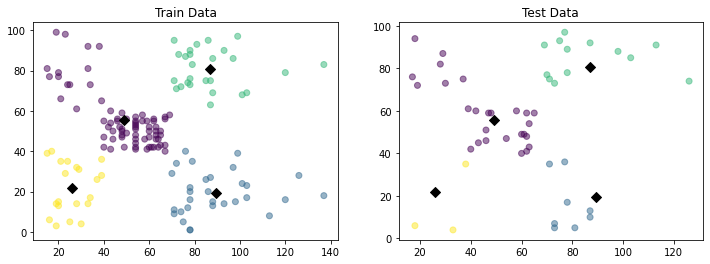

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
axs[0].scatter(df_train_2col["Income"],df_train_2col["Score"],c=df_train_2col["labels"],alpha=0.5)
axs[0].set_title("Train Data")
axs[1].scatter(df_test_2col["Income"],df_test_2col["Score"],c=df_test_2col["labels"],alpha=0.5)
axs[1].set_title("Test Data")
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
axs[0].scatter(centroids_x,centroids_y,marker="D",s=50,c="black")
axs[1].scatter(centroids_x,centroids_y,marker="D",s=50,c="black")

# **Evaluation of the clustering**

Inertia is a good way to evaluate K-Means clustering.

In [13]:
model.inertia_

53546.15564795564

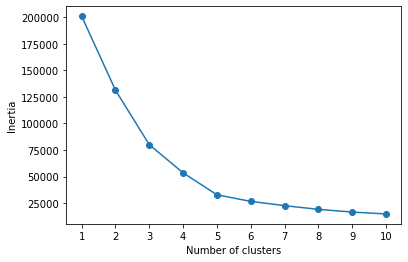

In [14]:
#Inertia vs Number of Clusters
inertia = []
clus_size=range(1,11)
for k in clus_size:
    model = KMeans(n_clusters=k)
    model.fit(tmp_train)
    inertia.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(clus_size, inertia, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(clus_size)
plt.show()

The inertia started decreasing slowly after five number of clusters. So, n_clusters = 4 is a decent parameter

Let's do the similar analysis for the whole dataset

In [15]:
df_train = pd.get_dummies(df_train,columns=["Gender"],drop_first=True)
df_test = pd.get_dummies(df_test,columns=["Gender"],drop_first=True)
model = KMeans(n_clusters=5)
model.fit(df_train)
labels_train = model.predict(df_train).copy()
labels_test = model.predict(df_test).copy()
res_train.head()

NameError: name 'res_train' is not defined

In [16]:
model.inertia_

57230.01899357473

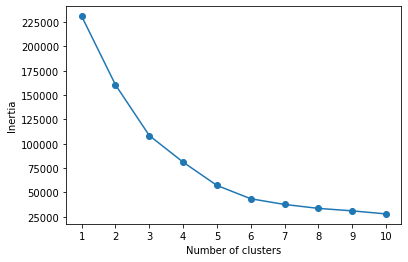

In [17]:
#Inertia vs Number of Clusters
inertia = []
clus_size=range(1,11)
for k in clus_size:
    model = KMeans(n_clusters=k)
    model.fit(df_train)
    inertia.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(clus_size, inertia, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(clus_size)
plt.show()

We can see that n_clusters = 5 is a good parameter from the above graph

# Standardization

k-Means algorithm doesn't work well with variables of different variances. In these cases, it is better to standardize the variables such that the variance of the variables are similar.

Generally, standard scalar is used to standardize. Let's make a pipeline to first standardize and then fit K-Means

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmeans = KMeans(n_clusters=5)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(df_train)
labels_train_std = pipeline.predict(df_train)
labels_test_std = pipeline.predict(df_test)

In [19]:
labels_train_std

array([2, 0, 0, 0, 2, 2, 1, 3, 2, 2, 0, 1, 0, 0, 4, 2, 0, 2, 3, 4, 0, 4,
       4, 0, 1, 3, 0, 1, 4, 3, 1, 1, 1, 4, 2, 4, 0, 2, 1, 1, 3, 1, 1, 1,
       1, 3, 4, 0, 1, 1, 4, 2, 0, 2, 4, 0, 3, 0, 0, 2, 2, 1, 2, 0, 2, 1,
       3, 2, 0, 2, 4, 1, 1, 4, 4, 0, 0, 3, 0, 2, 3, 1, 1, 3, 2, 2, 4, 0,
       0, 4, 3, 4, 3, 3, 2, 1, 3, 1, 2, 1, 0, 0, 1, 2, 4, 1, 4, 0, 0, 2,
       4, 4, 3, 3, 3, 0, 4, 0, 1, 0, 0, 2, 3, 0, 4, 1, 0, 1, 1, 0, 2, 3,
       0, 1, 2, 1, 1, 0, 4, 2, 3, 4, 2, 2, 0, 4, 1, 3, 1, 0], dtype=int32)